# Parameter Estimation for a Scalar Nonlinear Differential Equation

This tutorial demonstrates how to estimate the parameters of a scalar nonlinear differential equation using Python.

## Overview
We will:
1. Define a nonlinear ODE model.
2. Generate synthetic data using `solve_ivp` and add noise.
3. Estimate parameters by fitting the data using `least_squares`.
4. Plot the results to compare the noisy data and the estimated model.

## Implementation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares

# Define the logistic growth ODE model
def nonlinear_ode(t, y, a, b):
    return a * y * (1 - b * y)

# Generate synthetic data
def generate_data(a_true, b_true, y0, t_span, t_eval, noise_std=0.05):
    sol = solve_ivp(nonlinear_ode, t_span, [y0], t_eval=t_eval, args=(a_true, b_true))
    assert sol.success, "Integration failed"
    y_noisy = sol.y[0] + np.random.normal(0, noise_std, size=sol.y.shape[1])
    return t_eval, y_noisy

# Function to fit the parameters
def estimate_parameters(t, y_meas, y0):
    def residuals(params):
        a, b = params
        sol = solve_ivp(nonlinear_ode, (t[0], t[-1]), [y0], t_eval=t, args=(a, b))
        assert sol.success, "Integration failed"
        return sol.y[0] - y_meas
    
    initial_guess = [0.5, 0.1]

    result = least_squares(residuals, x0=initial_guess)
    return result.x


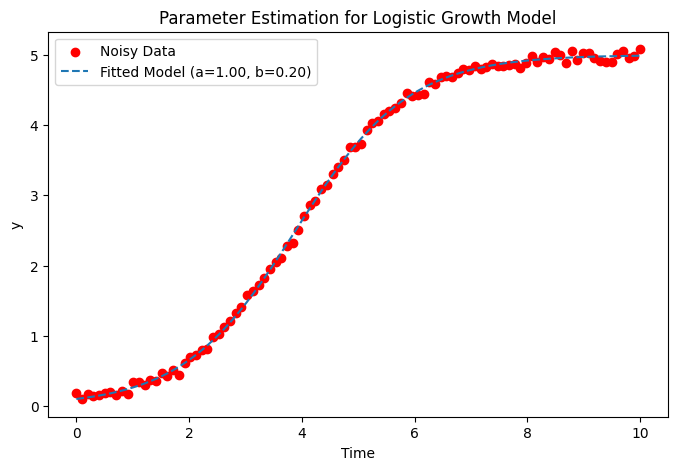

Estimated Parameters: a = 1.00, b = 0.20


In [4]:
# True parameters
a_true = 1.0
b_true = 0.2
y0 = 0.1
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Generate data
t, y_meas = generate_data(a_true, b_true, y0, t_span, t_eval)

# Estimate parameters
a_est, b_est = estimate_parameters(t, y_meas, y0)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(t, y_meas, label="Noisy Data", color='red')
sol_est = solve_ivp(nonlinear_ode, t_span, [y0], t_eval=t, args=(a_est, b_est))
plt.plot(t, sol_est.y[0], label=f"Fitted Model (a={a_est:.2f}, b={b_est:.2f})", linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("y")
plt.legend()
plt.title("Parameter Estimation for Logistic Growth Model")
plt.show()

print(f"Estimated Parameters: a = {a_est:.2f}, b = {b_est:.2f}")

## Explanation
- We define the **logistic growth equation**: $ \frac{dy}{dt} = a y (1 - b y) $.
- This model is commonly used in population dynamics, ensuring bounded and numerically stable growth.
- We generate synthetic data by solving the ODE numerically and adding noise.
- We estimate the parameters by solving an inverse problem using `least_squares`, which minimizes the residual between observed and simulated values.
- Finally, we visualize the results to compare the noisy data with the fitted model.

## Results
The estimated parameters should be close to the true values $ a = 1.0 $, $ b = 0.2 $, with some deviation due to noise.
